# New J. Phys. **22**, 063041 - Plots

## Imports

In [1]:
# dependencies
import numpy as np
import scipy.constants as sc

# qom v0.7.0 modules
from qom.loopers import XYLooper
from qom.systems import SODMSystem
from qom.ui import init_log

# initialize log
init_log()

MainProcess              INFO    2021-05-15 13:44:07.597: (qom.ui.log) ------------------------------Logger Initialized-----------------


## The System Class

In [2]:
class System(SODMSystem):
    """Class to simulate the OEM system in New J. Phys. 22, 063041.

    Parameters
    ----------
    params : dict
        Parameters for the system.
    """

    def __init__(self, params):
        """Class constructor for System."""
        
        # initialize super class
        super().__init__(params)

        # set attributes
        self.code = 'system'
        self.name = 'OEM System in NJP 22, 063041'  
        # default parameters
        self.params = {
            'Delta_norm': params.get('Delta_norm', 1.0),
            'Delta_type': params.get('Delta_type', 'absolute'),
            'G_norm': params.get('G_norm', 0.3),
            'g_norm': params.get('g_norm', 0.3),
            'gamma_LC_norm': params.get('gamma_LC_norm', 1.0),
            'gamma_m_norm': params.get('gamma_m_norm', 1.0),
            'kappa_norm': params.get('kappa_norm', 1.0),
            'omega_LC_norm': params.get('omega_LC_norm', 1.0),
            'omega_m': params.get('omega_m', 1.0),
            'T_LC': params.get('n_LC', 0),
            'T_m': params.get('n_m', 0)
        }
        # matrices
        self.A = None
        self.D = None

    def get_A(self, modes):
        """Function to obtain the drift matrix.
        
        Returns
        -------
        A : list
            Drift matrix.
        modes : list
            Values of the optical and mechancial modes.
        """

        # extract frequently used variables
        G_norm          = self.params['G_norm']
        g_norm          = self.params['g_norm']
        gamma_LC_norm   = self.params['gamma_LC_norm']
        gamma_m_norm    = self.params['gamma_m_norm']
        kappa_norm      = self.params['kappa_norm']

        # get frequencies
        Delta, omega_m, omega_LC, omega_LC_prime = self.get_frequencies()

        # update variables
        G       = G_norm * kappa_norm * omega_m
        g       = g_norm * kappa_norm * omega_m
        gamma_LC= gamma_LC_norm * omega_LC
        gamma_m = gamma_m_norm * omega_m
        kappa   = kappa_norm * omega_m

        # drift matrix
        if self.A is None or np.shape(self.A) != (6, 6):
            self.A = np.zeros([6, 6], dtype=np.float_)
        self.A[0][0] = - kappa
        self.A[0][1] = Delta
        self.A[1][0] = - Delta
        self.A[1][1] = - kappa
        self.A[1][2] = G

        self.A[2][3] = omega_m
        self.A[3][0] = G
        self.A[3][2] = - omega_m
        self.A[3][3] = - gamma_m
        self.A[3][4] = - g

        self.A[4][5] = omega_LC_prime
        self.A[5][2] = - g
        self.A[5][4] = - omega_LC_prime
        self.A[5][5] = - gamma_LC

        return self.A

    def get_D(self):
        """Function to obtain the noise correlation matrix.
        
        Returns
        -------
        D : list
            Noise correlation matrix.
        """

        # extract frequently used variables
        gamma_LC_norm   = self.params['gamma_LC_norm']
        gamma_m_norm    = self.params['gamma_m_norm']
        kappa_norm      = self.params['kappa_norm']
        T_LC            = self.params['T_LC']
        T_m             = self.params['T_m']

        # get frequencies
        _, omega_m, omega_LC, _ = self.get_frequencies()

        # update decays
        gamma_LC= gamma_LC_norm * omega_LC
        gamma_m = gamma_m_norm * omega_m
        kappa   = kappa_norm * omega_m
        n_LC    = sc.k * T_LC / sc.hbar / omega_LC
        n_m     = sc.k * T_m / sc.hbar / omega_m

        # noise correlation matrix
        if self.D is None or np.shape(self.D) != (6, 6):
            self.D = np.zeros([6, 6], dtype=np.float_)
        self.D[0][0] = kappa
        self.D[1][1] = kappa
        self.D[3][3] = gamma_m * (2 * n_m + 1)
        self.D[5][5] = gamma_LC * (2 * n_LC + 1)

        return self.D

    def get_frequencies(self):
        """Function to obtain the frequencies.
        
        Returns
        -------
        Delta : float
            Effective cavity-laser detuning.
        omega_m : float
            Mechanical frequency.
        omega_LC : float
            LC frequency.
        omega_LC_prime : float
            Effective LC frequency.
        """
        
        # extract frequently used variables
        Delta_norm      = self.params['Delta_norm']
        Delta_type      = self.params['Delta_type']
        omega_LC_norm   = self.params['omega_LC_norm']
        omega_m         = self.params['omega_m']

        # effective cavity-laser detuning
        if Delta_type == 'relative':
            Delta = Delta_norm * omega_LC_norm * omega_m
        else:
            Delta = Delta_norm * omega_m
        # LC frequency
        omega_LC = omega_LC_norm * omega_m
        # effective LC frequency
        omega_LC_prime = omega_LC
            
        return Delta, omega_m, omega_LC, omega_LC_prime

## Scripts

### Utility Functions

In [3]:
# function to calculate entanglement
def func_measure(system_params, val, logger, results):
    # update parameters
    system.params = system_params
    # get modes and correlations
    modes, corrs = system.get_stationary_modes_corrs(None, None, system.get_A, system.get_D)
    # get measure
    measure = system.get_measure_stationary(params['solver'], modes, corrs)
    # update results
    results.append((val, measure))

### Figure 2a

MainProcess              INFO    2021-05-15 13:44:07.668: (qom.loopers.XYLooper) --------------------Looper Initialized-----------------	
MainProcess              INFO    2021-05-15 13:44:10.817: (qom.loopers.XYLooper) --------------------Values Obtained--------------------	


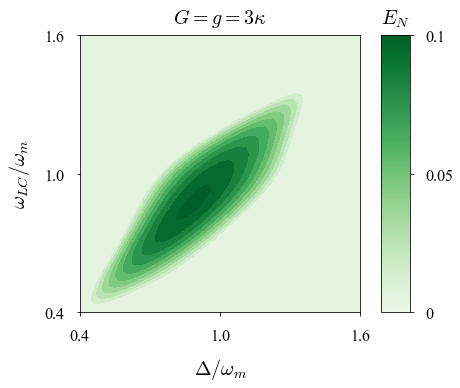

MainProcess              INFO    2021-05-15 13:44:11.403: (qom.loopers.XYLooper) --------------------Results Plotted--------------------	


In [4]:
# all parameters
params = {
    'looper': {
        'X': {
            'var': 'Delta_norm',
            'min': 0.4,
            'max': 1.6,
            'dim': 121
        },
        'Y': {
            'var': 'omega_LC_norm',
            'min': 0.4,
            'max': 1.6,
            'dim': 121
        }
    },
    'solver': {
        'measure_type': 'qcm',
        'qcm_type': 'entan',
        'idx_mode_i': 1,
        'idx_mode_j': 2,
    },
    'system': {
        'Delta_norm': 1.0,
        'Delta_type': 'absolute',
        'G_norm': 3, 
        'g_norm': 3, 
        'gamma_LC_norm': 1e-5,
        'gamma_m_norm': 1e-6,
        'kappa_norm': 0.1,
        'omega_LC_norm': 1.0,
        'omega_m': 2 * np.pi * 1e6,
        'T_LC': 1e-2,
        'T_m': 1e-2
    },
    'plotter': {
        'type': 'contourf',
        'palette': 'Greens',
        'bins': 11,
        'title': '$G = g = 3 \\kappa$',
        'x_label': '$\\Delta / \\omega_{m}$',
        'x_bound': 'both',
        'x_ticks': [0.4, 1.0, 1.6],
        'y_label': '$\\omega_{LC} / \\omega_{m}$',
        'y_bound': 'both',
        'y_ticks': [0.4, 1.0, 1.6],
        'cbar_title': '$E_{N}$',
        'cbar_ticks': [0, 0.05, 0.1]
    }
}

# initialize system
system = System(params['system'])
    
# looper
looper = XYLooper(func_measure, params)
results = looper.loop(plot=True, width=6, height=5.5)

### Figure 2b

MainProcess              INFO    2021-05-15 13:44:11.442: (qom.loopers.XYLooper) --------------------Looper Initialized-----------------	
MainProcess              INFO    2021-05-15 13:44:14.621: (qom.loopers.XYLooper) --------------------Values Obtained--------------------	


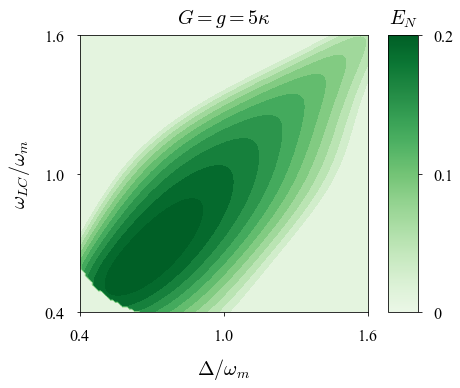

MainProcess              INFO    2021-05-15 13:44:15.031: (qom.loopers.XYLooper) --------------------Results Plotted--------------------	


In [5]:

# all parameters
params = {
    'looper': {
        'X': {
            'var': 'Delta_norm',
            'min': 0.4,
            'max': 1.6,
            'dim': 121
        },
        'Y': {
            'var': 'omega_LC_norm',
            'min': 0.4,
            'max': 1.6,
            'dim': 121
        }
    },
    'solver': {
        'measure_type': 'qcm',
        'qcm_type': 'entan',
        'idx_mode_i': 1,
        'idx_mode_j': 2,
    },
    'system': {
        'Delta_norm': 1.0,
        'Delta_type': 'absolute',
        'G_norm': 5, 
        'g_norm': 5, 
        'gamma_LC_norm': 1e-5,
        'gamma_m_norm': 1e-6,
        'kappa_norm': 0.1,
        'omega_LC_norm': 1.0,
        'omega_m': 2 * np.pi * 1e6,
        'T_LC': 1e-2,
        'T_m': 1e-2
    },
    'plotter': {
        'type': 'contourf',
        'palette': 'Greens',
        'bins': 11,
        'title': '$G = g = 5 \\kappa$',
        'x_label': '$\\Delta / \\omega_{m}$',
        'x_bound': 'both',
        'x_ticks': [0.4, 1.0, 1.6],
        'y_label': '$\\omega_{LC} / \\omega_{m}$',
        'y_bound': 'both',
        'y_ticks': [0.4, 1.0, 1.6],
        'cbar_title': '$E_{N}$',
        'cbar_ticks': [0, 0.1, 0.2]
    }
}

# initialize system
system = System(params['system'])
    
# looper
looper = XYLooper(func_measure, params)
results = looper.loop(plot=True, width=6, height=5.5)

### Figure 3a

MainProcess              INFO    2021-05-15 13:44:15.058: (qom.loopers.XYLooper) --------------------Looper Initialized-----------------	
MainProcess              INFO    2021-05-15 13:44:16.597: (qom.loopers.XYLooper) --------------------Values Obtained--------------------	


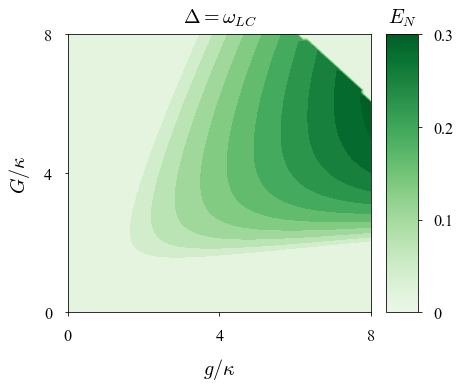

MainProcess              INFO    2021-05-15 13:44:16.985: (qom.loopers.XYLooper) --------------------Results Plotted--------------------	


In [6]:
# all parameters
params = {
    'looper': {
        'X': {
            'var': 'g_norm',
            'min': 0,
            'max': 8,
            'dim': 81
        },
        'Y': {
            'var': 'G_norm',
            'min': 0,
            'max': 8,
            'dim': 81
        }
    },
    'solver': {
        'measure_type': 'qcm',
        'qcm_type': 'entan',
        'idx_mode_i': 1,
        'idx_mode_j': 2,
    },
    'system': {
        'Delta_norm': 1.0,
        'Delta_type': 'relative',
        'G_norm': 5, 
        'g_norm': 5, 
        'gamma_LC_norm': 1e-5,
        'gamma_m_norm': 1e-6,
        'kappa_norm': 0.1,
        'omega_LC_norm': 1.0,
        'omega_m': 2 * np.pi * 1e6,
        'T_LC': 1e-2,
        'T_m': 1e-2
    },
    'plotter': {
        'type': 'contourf',
        'palette': 'Greens',
        'bins': 11,
        'title': '$\\Delta = \\omega_{LC}$',
        'x_label': '$g / \\kappa$',
        'x_bound': 'both',
        'x_ticks': [0, 4, 8],
        'y_label': '$G / \\kappa$',
        'y_bound': 'both',
        'y_ticks': [0, 4, 8],
        'cbar_title': '$E_{N}$',
        'cbar_ticks': [0, 0.1, 0.2, 0.3]
    }
}

# initialize system
system = System(params['system'])
    
# looper
looper = XYLooper(func_measure, params)
results = looper.loop(plot=True, width=6, height=5.5)